In [2]:
import oracles
import numpy as np
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, diags
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from inspect import getfullargspec
from itertools import product
from optimization import *
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt

In [3]:
qo1 = oracles.QuadraticOracle(np.array([[1, 0], [0, 1]]), np.array([-0.5, 0.5]))
qo2 = oracles.QuadraticOracle(np.array([[2, 1], [1, 1.5]]), np.array([0.2, 0.4]))

c:\Users\hkl19\Desktop\optlab1\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


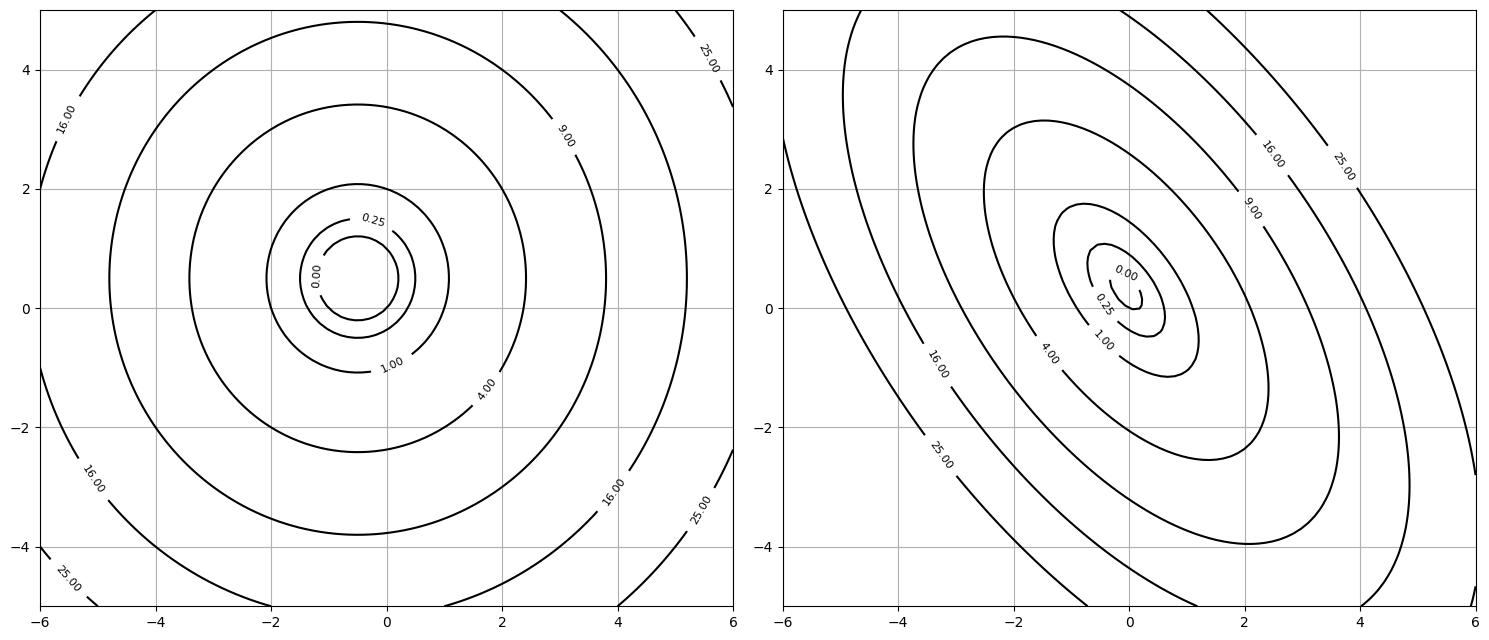

In [23]:
plt.figure(figsize=(15,6.5))
plt.subplot(1,2,1)
plot_levels(qo1.func)
plt.subplot(1,2,2)
plot_levels(qo2.func)
plt.tight_layout()
plt.show()


***Wolfe***

In [29]:
def draw_history(tool, oracle, x_0):
    plt.figure(figsize=(15.7,4.5))
    for i, x in enumerate(x_0):
        plt.subplot(1,3,i+1)
        lst = LineSearchTool(tool)
        _, _, history = gradient_descent(oracle, x, trace=True, line_search_options=lst, max_iter=20)
        plot_levels(oracle.func)
        plot_trajectory(oracle.func, history['x'], label=i)
    plt.tight_layout()
    plt.show()

c:\Users\hkl19\Desktop\optlab1\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


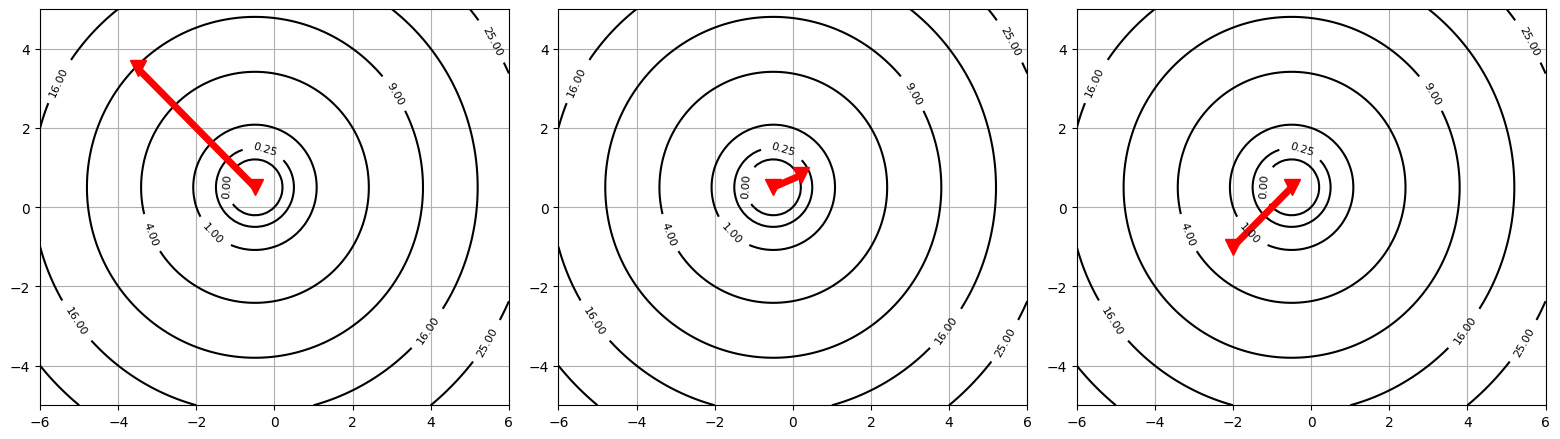

In [30]:
x_0s = np.array([[-3.5, 3.5], [0.2, 0.8], [-2, -1]])
draw_history('Wolfe', qo1,x_0s)

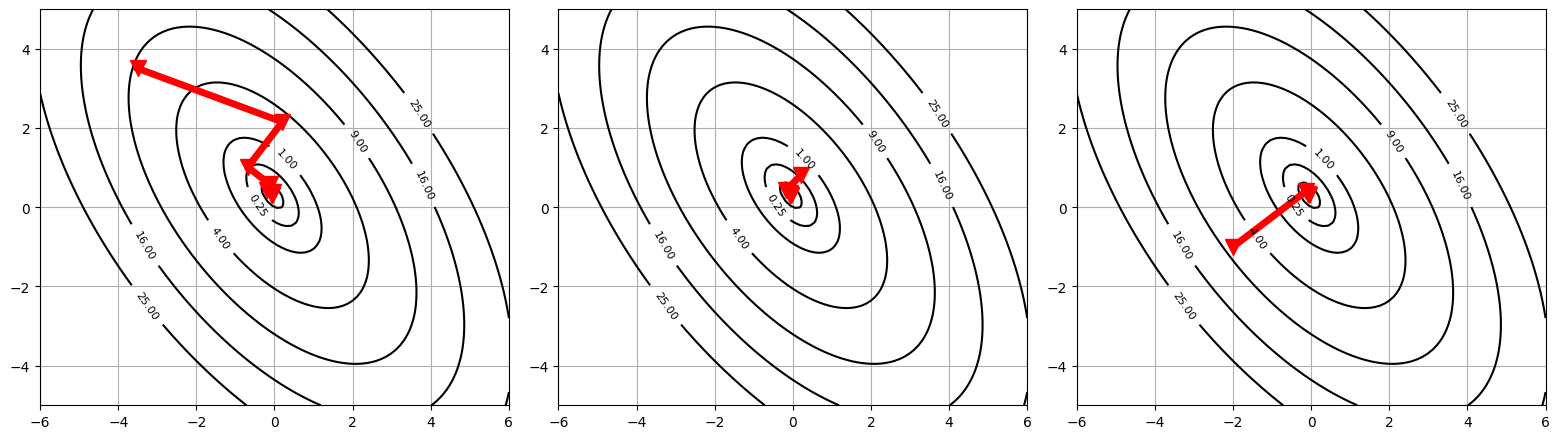

In [31]:
draw_history('Wolfe', qo2, x_0s)

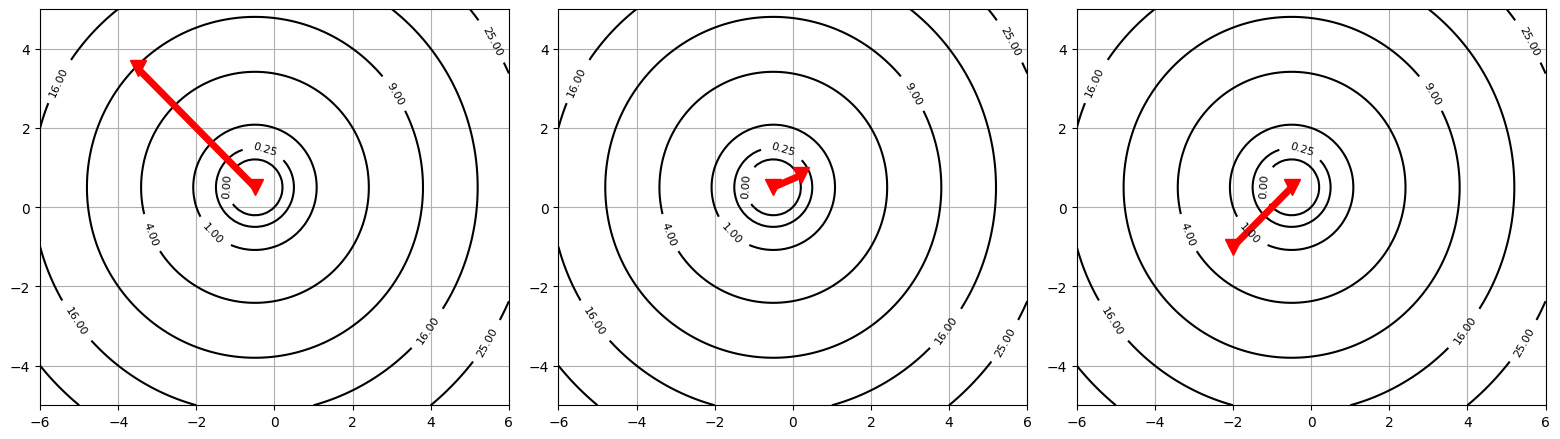

In [32]:
draw_history('Armijo', qo1,x_0s)

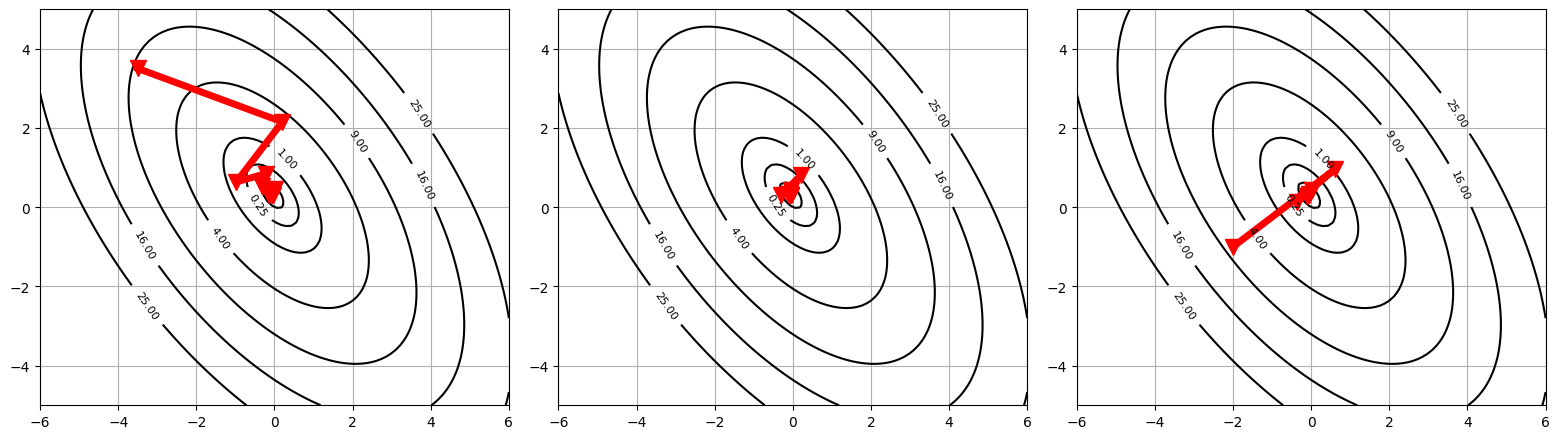

In [33]:
draw_history('Armijo', qo2, x_0s)

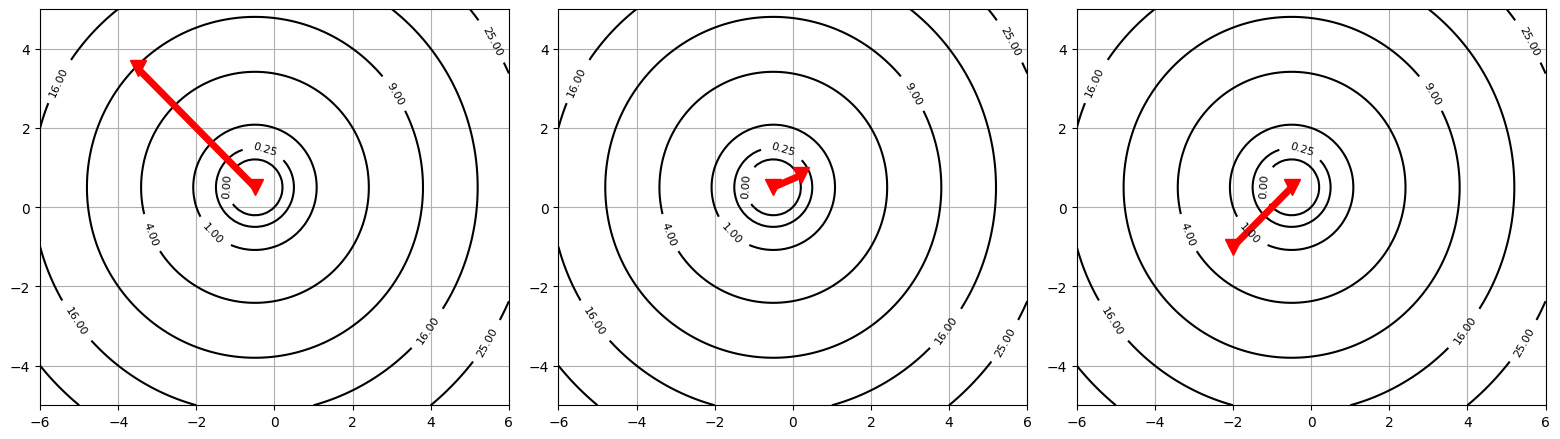

In [34]:
draw_history('Constant', qo1,x_0s)

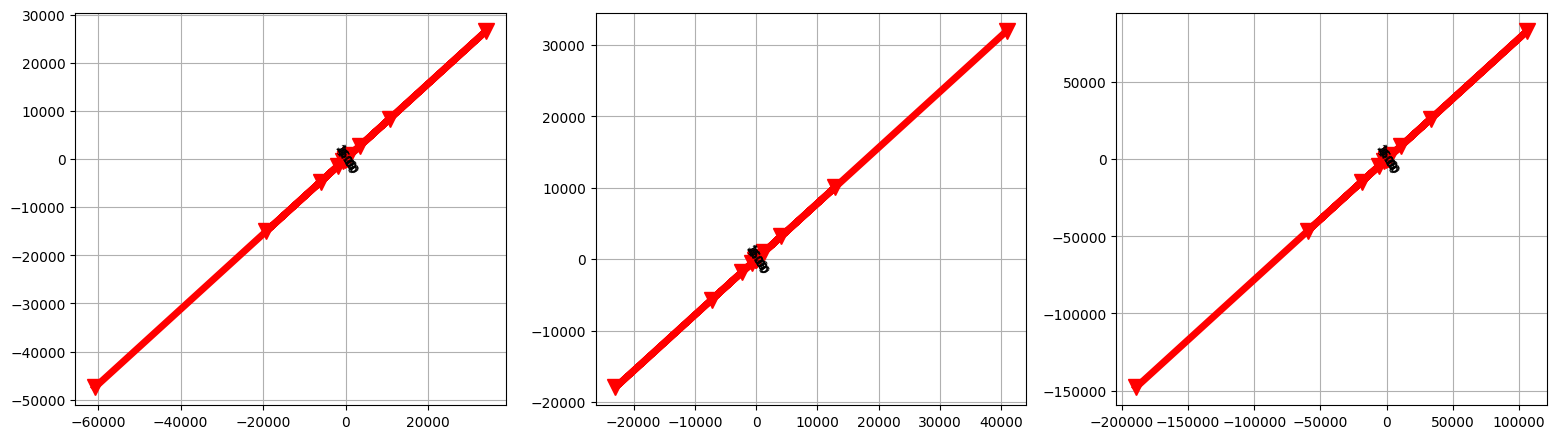

In [35]:
draw_history('Constant', qo2, x_0s)

In [43]:
np.random.seed(45)
random.seed(46)

def get_random_array_x(shape, cnt=10):
    array_x = []
    for _ in range(cnt):
        array_x.append(np.random.rand(shape) * 10 - 5)

    return array_x

def avg_time_to_convergence(n, k, array_x=None, cnt=10, method = 'Wolfe'):
    if array_x is None:
        array_x = get_random_array_x(n, cnt)
    oracle = oracles.QuadraticOracle(
      diags(np.random.randint(1, k + 1, n)), np.random.rand(n) * 10 - 5)

    result = 0
    lst = LineSearchTool(method)
    for x in array_x:
        _, _, history = gradient_descent(oracle, x, trace=True, line_search_options=lst)
        result += len(history['time']) / cnt

    return result

C:\Users\hkl19\AppData\Local\Temp\ipykernel_23020\2302709005.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.675 1.925 2.25  1.2   2.3   1.025 1.225 1.175 1.75  2.575 2.55  0.95
 2.275 2.3   1.25  1.725 2.5   1.15  1.075 1.375]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['i'] == 0) & (df['n'] == n), 'avg_time'] += (df_ni['convergence_time'].to_numpy()) / len(launches)


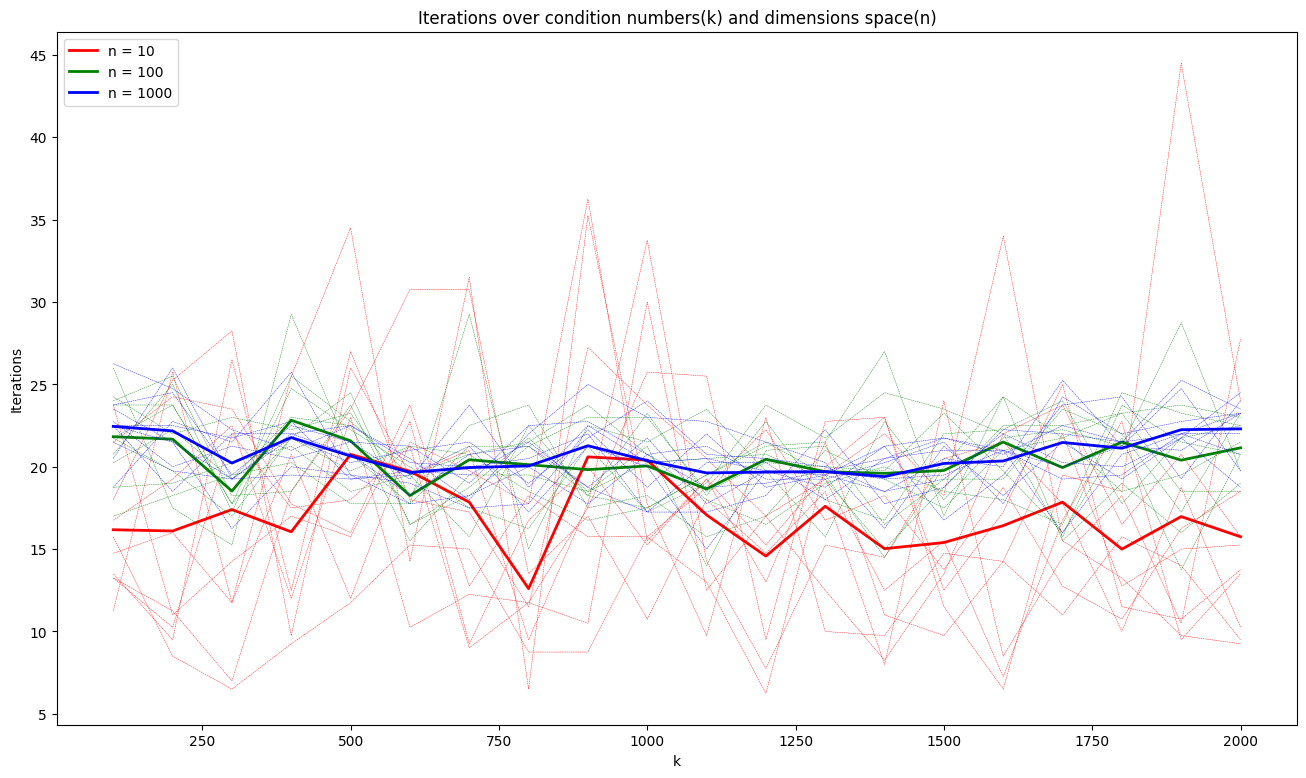

In [44]:
launches = range(10)
array_n = np.logspace(1, 3, 3, dtype=int)
array_k = (np.arange(20)+1)*100
df = pd.DataFrame(columns=['i', 'n', 'k', 'convergence_time'])
for i, (launch, n, k) in enumerate(product(launches, array_n, array_k)):
    df.loc[i] = [launch, n, k, avg_time_to_convergence(n, k, cnt = 4, method='Wolfe')]

df['avg_time'] = 0
colors = ['r', 'g', 'b']
plt.figure(figsize=(16, 9))
for n, color in zip(array_n, colors):
    for i in launches:
        df_ni = df[(df['i'] == i) & (df['n'] == n)]
        plt.plot(df_ni['k'], df_ni['convergence_time'], color=color, linestyle='--', linewidth=.3)
        df.loc[(df['i'] == 0) & (df['n'] == n), 'avg_time'] += (df_ni['convergence_time'].to_numpy()) / len(launches)

    df_n0 = df[(df['i'] == 0) & (df['n'] == n)]
    
    plt.plot(df_n0['k'], df_n0['avg_time'], color=color, linewidth=2, label='n = ' + str(n))

plt.xlabel('k')
plt.ylabel('Iterations')
plt.title('Iterations over condition numbers(k) and dimensions space(n)')
plt.legend()
plt.show()

C:\Users\hkl19\AppData\Local\Temp\ipykernel_23020\3567707113.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8   1.8   0.825 3.375 2.05  1.2   1.4   1.75  1.6   1.9   1.55  1.35
 1.275 2.175 2.575 1.575 1.075 4.8   1.05  3.2  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['i'] == 0) & (df['n'] == n), 'avg_time'] += (df_ni['convergence_time'].to_numpy()) / len(launches)


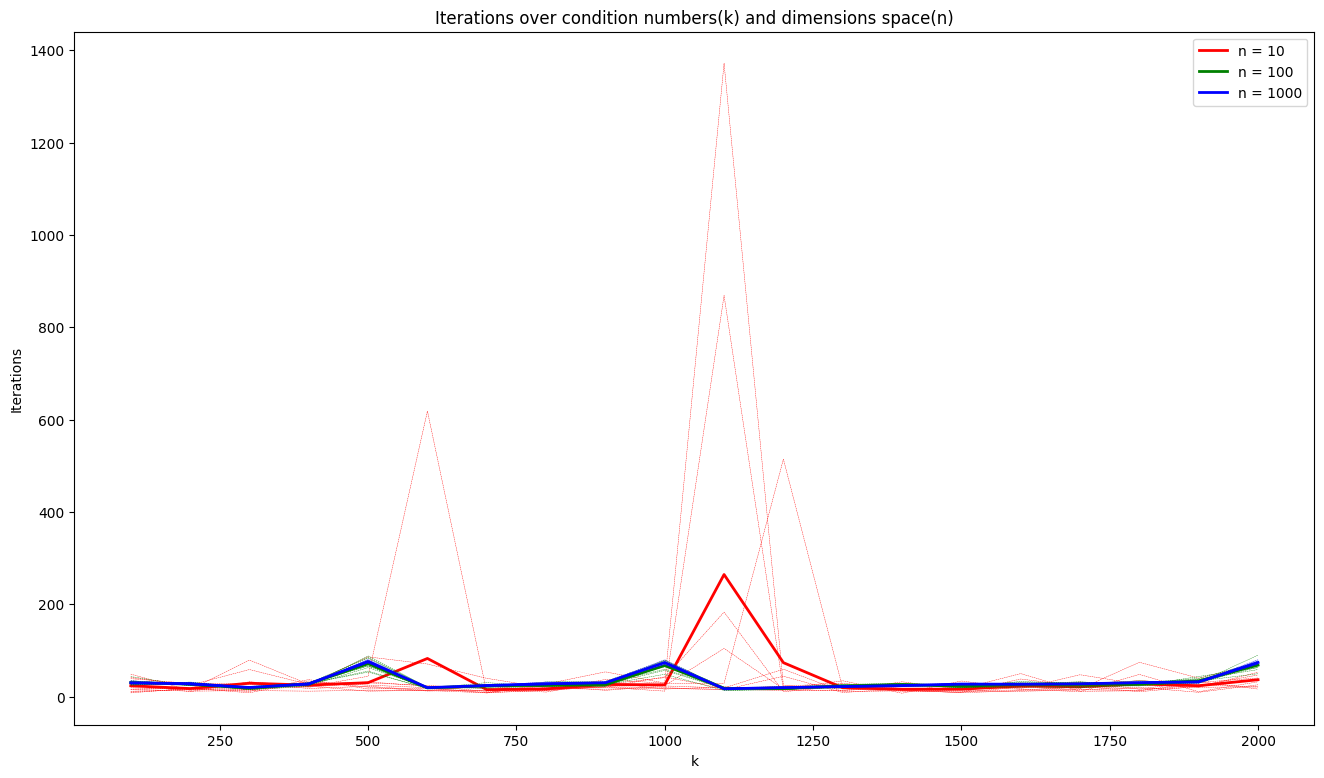

In [45]:
launches = range(10)
array_n = np.logspace(1, 3, 3, dtype=int)
array_k = (np.arange(20)+1)*100
df = pd.DataFrame(columns=['i', 'n', 'k', 'convergence_time'])
for i, (launch, n, k) in enumerate(product(launches, array_n, array_k)):
    df.loc[i] = [launch, n, k, avg_time_to_convergence(n, k, cnt = 4, method='Armijo')]

df['avg_time'] = 0
colors = ['r', 'g', 'b']
plt.figure(figsize=(16, 9))
for n, color in zip(array_n, colors):
    for i in launches:
        df_ni = df[(df['i'] == i) & (df['n'] == n)]
        plt.plot(df_ni['k'], df_ni['convergence_time'], color=color, linestyle='--', linewidth=.3)
        df.loc[(df['i'] == 0) & (df['n'] == n), 'avg_time'] += (df_ni['convergence_time'].to_numpy()) / len(launches)

    df_n0 = df[(df['i'] == 0) & (df['n'] == n)]
    
    plt.plot(df_n0['k'], df_n0['avg_time'], color=color, linewidth=2, label='n = ' + str(n))

plt.xlabel('k')
plt.ylabel('Iterations')
plt.title('Iterations over condition numbers(k) and dimensions space(n)')
plt.legend()
plt.show()